# Spring-Mass-Damper Model
This notebook models a basic damped spring-mass system. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [14]:
# Define environment variables
w = 2 * np.pi # Natural frequency
d = 0.25 # Damping ratio

# Spring-mass damper system
A = np.array([[0, 1],
              [-w**2, -2 * d * w]]) # System evolves according to \dot{x} = Ax

dT = 0.01 # Time step
T = 10 # Total amount of time to integrate
n = int(T / dT) # Total whole number of timesteps
t = np.linspace(0, T, n)

# Set initial condition
x0 = [2, 0] # Setting initial condition [x, v]

# Iterating using forward Euler
xF = np.zeros((2, n)) # Creates 2xn matrix of zeros
xF[:, 0] = x0 # Setting both rows in the 1st column of xF equal to the initial condition
for i in range(n-1):
    xF[:, i + 1] = (np.eye(2) + dT * A) @ xF[:, i] # Advance the state of the system given the dynamics and current state of the system

# Compute integral using a more precise method: 4th-order Rugne Kutta
def linear_ODE(t, x):
    return A @ x # Compute matrix-vector product of A and x

linear_ode_solution = solve_ivp(linear_ODE, (0, T), x0, t_eval = t) # Compute RK45 integral of our system from time 0 to T, given initial condition x0 and time derviative of the system as the output of the callable function linear_ODE
xGoodSolution = linear_ode_solution.y # Returns an ndarray of the values of the solution at point t

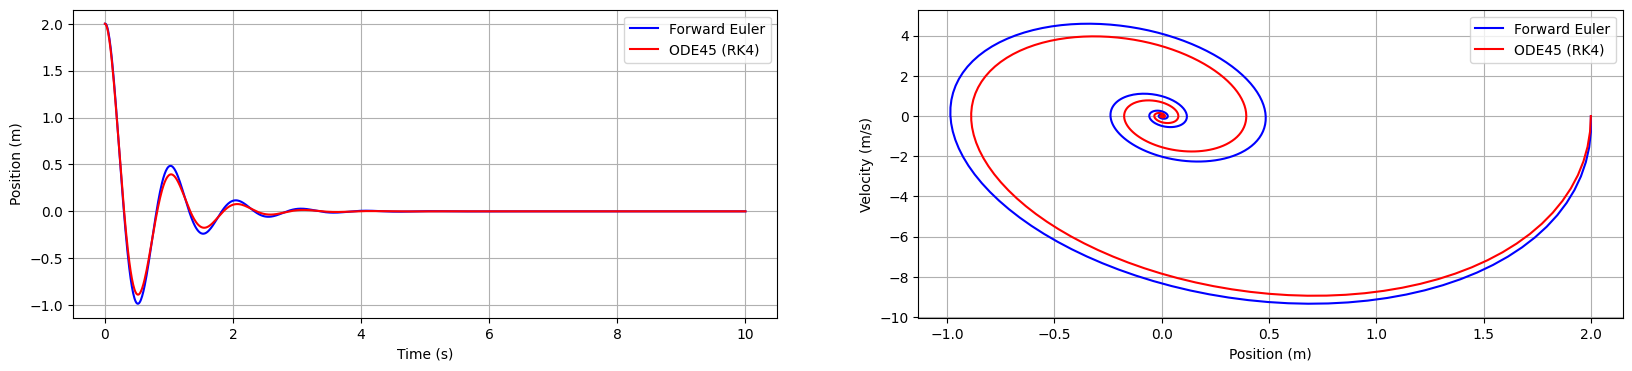

In [15]:
# Plot the system
plt.figure(figsize = (20, 4))
plt.subplot(1, 2, 1)
plt.plot(t, xF[0, :], 'b')
plt.plot(t, xGoodSolution[0, :], 'r')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(xF[0, :], xF[1, :], 'b')
plt.plot(xGoodSolution[0, :], xGoodSolution[1, :], 'r')
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)